# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance (accuracy, precision, recall, and f-score) as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client for a any sepcific number of clients of your choice. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [2]:
np.random.seed(2175107) # Set seed for numpy. Put your SID instead of number '42'
random.seed(2175107) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(2175107) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model


# 2 Clients

In [6]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)



In [7]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)


Epoch 1/5


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8417 - loss: 0.5603
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9488 - loss: 0.1775
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9660 - loss: 0.1203
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9742 - loss: 0.0883
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9809 - loss: 0.0664
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8337 - loss: 0.5792
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9486 - loss: 0.1826
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9650 - loss: 0.1237
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9754 - loss: 0.0897
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0670


In [8]:

# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [9]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())


In [10]:

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)


In [11]:
# Evaluate global model

test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8960 - loss: 0.3703
Test accuracy: 0.8960000276565552


In [12]:
test_accuracy = []
test_accuracy.append(test_acc)
test_accuracy

[0.8960000276565552]

In [13]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)



313/313 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.3703
Test accuracy: 0.8960000276565552


In [14]:

##
##
## Write your code to calculate precision, recall, and F-score
##
##
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = global_model.predict(x_test)
predictions = list(predictions.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f_score = f1_score(y_test, predictions, average='macro')

In [16]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train is your target data
y_train_encoded = to_categorical(y_train)


In [17]:
#print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("precision:", precision_score(y_test, predictions, average='macro'))
print("recall:", recall_score(y_test, predictions, average='macro'))
print("f_score:", f1_score(y_test, predictions, average='macro'))

Accuracy: 0.896
precision: 0.9056308290226754
recall: 0.8951565703801515
f_score: 0.8962511037952376


In [18]:
test_precision = []
test_recall = []
test_f1_score = []

In [19]:
test_precision.append(precision_score(y_test, predictions, average='macro'))
test_recall.append(recall_score(y_test, predictions, average='macro'))
test_f1_score.append(f1_score(y_test, predictions, average='macro'))

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

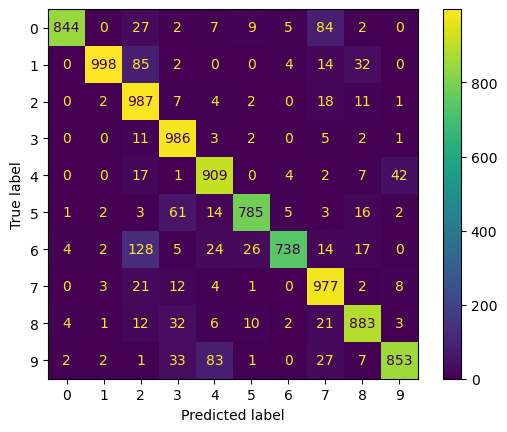

In [21]:
#display confusion matrix between test output and predicted output
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot();
#plt.show()

# Lab Logbook requirement: Document the following in lablogbook

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.




# 4 clients 

In [22]:
# Split data into 4 clients
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [23]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [24]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])

C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7874 - loss: 0.7635
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9364 - loss: 0.2223
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1490
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.1089
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0823
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0948 - loss: 2.3326
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1219 - loss: 2.2947
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1327 - loss: 2.2843
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1495 - loss: 2.2707
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1619 - loss: 2.2509
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0960 - loss: 2.3290
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [25]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights


In [26]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [27]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.2018 - loss: 2.2753
Test accuracy: 0.20180000364780426


In [28]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [29]:
print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

Accuracy:  0.2018
Precision:  0.25971849453124746
Recall:  0.2018
F-score:  0.1861028752130123


In [31]:
# Initialize as empty lists
test_acc = []
test_precision = []
test_recall = []


In [32]:
test_acc.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

In [33]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8960000276565552]
[0.25971849453124746]
[0.2018]
[0.8962511037952376, 0.1861028752130123]


# 6 clients

In [34]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [35]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

Epoch 1/5


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7505 - loss: 0.8787
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9305 - loss: 0.2618
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9517 - loss: 0.1886
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9639 - loss: 0.1443
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1119
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0965 - loss: 2.3374
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1257 - loss: 2.2903
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1488 - loss: 2.2717
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1685 - loss: 2.2498
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1820 - loss: 2.2210
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0967 - loss: 2.3437
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1222 - los

In [36]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [37]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - 2ms/step - accuracy: 0.6534 - loss: 2.0158
Test accuracy: 0.6534000039100647
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
Accuracy:  0.6534
Precision:  0.7372990496565246
Recall:  0.6534
F-score:  0.6478257404323313
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       980
           1       0.89      0.98      0.93      1135
           2       0.54      0.84      0.66      1032
           3       0.83      0.79      0.81      1010
           4       0.84      0.34      0.48       982
           5       0.83      0.60      0.69       892
           6       0.83      0.50      0.63       958
           7       0.42      0.98      0.58      1028
           8       0.86      0.30      0.44       974
           9       0.44      0.49      0.46      1009

    accuracy                           0.65     10000
   macro avg       0.74      0.64      0.64     10000
weighted avg       0.74      0.65      0.65     10000



In [38]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8960000276565552, 0.6534]
[0.25971849453124746, 0.7372990496565246]
[0.2018, 0.6534]
[0.8962511037952376, 0.1861028752130123, 0.6478257404323313]


# 8 clients

In [39]:
Client_1 = (x_train[0:7500], y_train[0:7500])
Client_2 = (x_train[7500:15000], y_train[7500:15000])
Client_3 = (x_train[15000:22500], y_train[15000:22500])
Client_4 = (x_train[22500:30000], y_train[22500:30000])
Client_5 = (x_train[30000:37500], y_train[30000:37500])
Client_6 = (x_train[37500:45000], y_train[37500:45000])
Client_7 = (x_train[45000:52500], y_train[45000:52500])
Client_8 = (x_train[52500:], y_train[52500:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])

(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
Epoch 1/5


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7339 - loss: 0.9389
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9313 - loss: 0.2657
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9474 - loss: 0.1901
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1404
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.1062
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1110 - loss: 2.3407
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1327 - loss: 2.2859
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1521 - loss: 2.2643
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1713 - loss: 2.2329
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1898 - loss: 2.1974
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1061 - loss: 2.3376
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1402 - los

In [40]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4,
                              weights5, weights6, weights7, weights8):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8 in zip(weights1, weights2, weights3, weights4,
                                              weights5, weights6, weights7, weights8):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 +w8) / 8)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [41]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - 2ms/step - accuracy: 0.7590 - loss: 1.7904
Test accuracy: 0.7590000033378601
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
Accuracy:  0.759
Precision:  0.8133749642402177
Recall:  0.759
F-score:  0.7586680879991236
              precision    recall  f1-score   support

           0       0.94      0.62      0.74       980
           1       0.96      0.67      0.79      1135
           2       0.64      0.91      0.75      1032
           3       0.91      0.79      0.85      1010
           4       0.84      0.84      0.84       982
           5       0.62      0.89      0.73       892
           6       0.86      0.85      0.85       958
           7       0.55      0.96      0.70      1028
           8       0.99      0.45      0.62       974
           9       0.80      0.63      0.70      1009

    accuracy                           0.76     10000
   macro avg       0.81      0.76      0.76     10000
weighted avg       0.81      0.76      0.76     10000



In [42]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8960000276565552, 0.6534, 0.759]
[0.25971849453124746, 0.7372990496565246, 0.8133749642402177]
[0.2018, 0.6534, 0.759]
[0.8962511037952376, 0.1861028752130123, 0.6478257404323313, 0.7586680879991236]


# 10 clients

In [43]:
Client_1 = (x_train[0:6000], y_train[0:6000])
Client_2 = (x_train[6000:12000], y_train[6000:12000])
Client_3 = (x_train[12000:18000], y_train[12000:18000])
Client_4 = (x_train[18000:24000], y_train[18000:24000])
Client_5 = (x_train[24000:30000], y_train[24000:30000])
Client_6 = (x_train[30000:36000], y_train[30000:36000])
Client_7 = (x_train[36000:42000], y_train[36000:42000])
Client_8 = (x_train[42000:48000], y_train[42000:48000])
Client_9 = (x_train[48000:54000], y_train[48000:54000])
Client_10 = (x_train[54000:], y_train[54000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)
print(Client_9[0].shape)
print(Client_10[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)
print(Client_9[1].shape)
print(Client_10[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()
client9_model = create_client_model()
client10_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])
client9_model = train_client_model(client9_model, Client_9[0], Client_9[1])
client10_model = train_client_model(client10_model, Client_10[0], Client_10[1])

(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7058 - loss: 1.0459
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9214 - loss: 0.2915
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.2127
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9577 - loss: 0.1627
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9664 - loss: 0.1270
Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1002 - loss: 2.3497
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1412 - loss: 2.2805
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1626 - loss: 2.2501
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1881 - loss: 2.2152
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2152 - loss: 2.1759
Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1041 - loss: 2.3436
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

In [44]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5,
                              weights6, weights7, weights8, weights9, weights10):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 in zip(weights1, weights2, weights3, weights4,
                                                      weights5, weights6, weights7, weights8,
                                                      weights9, weights10):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights(),
                                               client9_model.get_weights(),
                                               client10_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [45]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - 2ms/step - accuracy: 0.6954 - loss: 1.8112
Test accuracy: 0.6953999996185303
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
Accuracy:  0.6954
Precision:  0.7957147722757295
Recall:  0.6954
F-score:  0.6912203768406556
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       980
           1       0.98      0.87      0.92      1135
           2       0.86      0.79      0.82      1032
           3       0.54      0.81      0.65      1010
           4       0.96      0.50      0.66       982
           5       0.44      0.93      0.60       892
           6       0.99      0.58      0.73       958
           7       0.51      0.97      0.67      1028
           8       0.87      0.24      0.37       974
           9       0.83      0.45      0.58      1009

    accuracy                           0.70     10000
   macro avg       0.79      0.69      0.69     10000
weighted avg       0.80      0.70      0.69     10000



In [46]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8960000276565552, 0.6534, 0.759, 0.6954]
[0.25971849453124746, 0.7372990496565246, 0.8133749642402177, 0.7957147722757295]
[0.2018, 0.6534, 0.759, 0.6954]
[0.8962511037952376, 0.1861028752130123, 0.6478257404323313, 0.7586680879991236, 0.6912203768406556]


# plot the models performance for the clients ranging 2,4,6,8,10

In [48]:
import pandas as pd
ErrorMetrics = []
ErrorMetrics.append(test_accuracy)
ErrorMetrics.append(test_precision)
ErrorMetrics.append(test_recall)
ErrorMetrics.append(test_f1_score)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = [2,4,6,8,10]
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.8960000276565552, 0.6534, 0.759, 0.6954], [0.25971849453124746, 0.7372990496565246, 0.8133749642402177, 0.7957147722757295], [0.2018, 0.6534, 0.759, 0.6954], [0.8962511037952376, 0.1861028752130123, 0.6478257404323313, 0.7586680879991236, 0.6912203768406556]]


,Accuracy,Precision,Recall,F1_Score
2,0.8960,0.259718,0.2018,0.896251
4,0.6534,0.737299,0.6534,0.186103
6,0.7590,0.813375,0.7590,0.647826
8,0.6954,0.795715,0.6954,0.758668
10,NaN,NaN,NaN,0.691220


<Axes: >

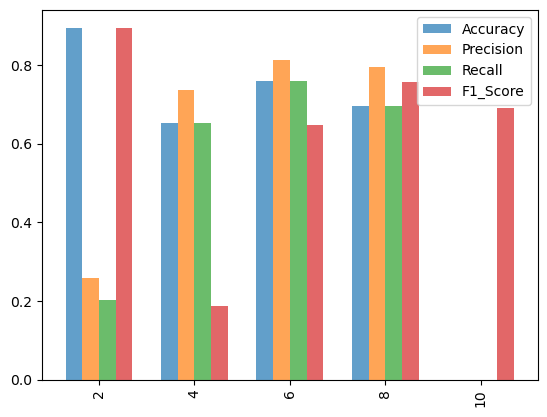

In [49]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

In [50]:
# Split data into 6 clients
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

In [61]:
Client_6[1].size

10000

In [52]:
Client_2[1]

array([3, 8, 7, ..., 1, 4, 2], dtype=uint8)

In [53]:
### Client_2 is assumed dishonest and changing the training data. Some labels are set as 4
### Change the first 2000 labels

Client_[1][:2000] = 3

In [62]:
Client_6[1]

array([3, 8, 6, ..., 5, 6, 8], dtype=uint8)

In [55]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [56]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

Epoch 1/5


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7444 - loss: 0.8922
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9295 - loss: 0.2675
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9455 - loss: 0.1976
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.1538
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1206
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0890 - loss: 2.3402
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1277 - loss: 2.2884
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1436 - loss: 2.2689
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1683 - loss: 2.2459
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1868 - loss: 2.2178
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1056 - loss: 2.3397
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1345 - los

In [57]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [58]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - 2ms/step - accuracy: 0.6444 - loss: 2.0223
Test accuracy: 0.6444000005722046
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
Accuracy:  0.6444
Precision:  0.7313836438677461
Recall:  0.6444
F-score:  0.6225259222756971
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       980
           1       0.90      0.13      0.22      1135
           2       0.80      0.58      0.67      1032
           3       0.69      0.78      0.73      1010
           4       0.97      0.58      0.73       982
           5       0.47      0.94      0.63       892
           6       0.60      0.94      0.73       958
           7       0.48      0.91      0.63      1028
           8       0.70      0.36      0.47       974
           9       0.77      0.70      0.73      1009

    accuracy                           0.64     10000
   macro avg       0.73      0.65      0.63     10000
weighted avg       0.73      0.64      0.62     10000



In [59]:
test_accuracy_dishonest  = []
test_precision_dishonest = []
test_recall_dishonest    = []
test_f1_score_dishonest  = []

In [68]:
test_accuracy_dishonest.append(test_accuracy[3])
test_precision_dishonest.append(test_precision[3])
test_recall_dishonest.append(test_recall[3])
test_f1_score_dishonest.append(test_f1_score[3])

test_accuracy_dishonest.append(0.5197999954223633)
test_precision_dishonest.append(0.5649681801937827)
test_recall_dishonest.append(0.5198)
test_f1_score_dishonest.append(0.5079021148713025)

print(test_accuracy_dishonest)
print(test_precision_dishonest)
print(test_recall_dishonest)
print(test_f1_score_dishonest)

[0.6954, 0.5197999954223633]
[0.7957147722757295, 0.5649681801937827]
[0.6954, 0.5198]
[0.7586680879991236, 0.5079021148713025]


In [71]:
### Plot the model's performance for the 6 clients, one of them (number=2) is dishonest

ErrorMetrics = []
ErrorMetrics.append(test_accuracy_dishonest)
ErrorMetrics.append(test_precision_dishonest)
ErrorMetrics.append(test_recall_dishonest)
ErrorMetrics.append(test_f1_score_dishonest)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = ['Every input is honest', 'Client 3 is honest']
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.6954, 0.5197999954223633], [0.7957147722757295, 0.5649681801937827], [0.6954, 0.5198], [0.7586680879991236, 0.5079021148713025]]


,Accuracy,Precision,Recall,F1_Score
Every input is honest,0.6954,0.795715,0.6954,0.758668
Client 3 is honest,0.5198,0.564968,0.5198,0.507902


<Axes: >

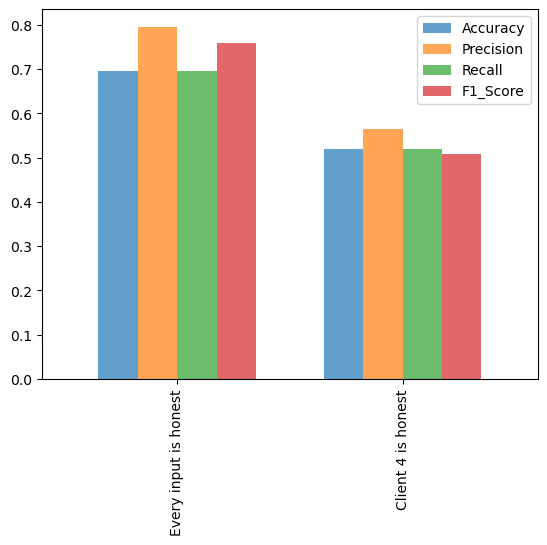

In [70]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

# Challenges (Optional):

## The above code is for one communication round. Write code for multiple communication rounds. In each communication round, clients will train the model on a new dataset. Then the server will merge all these models. Subsequently, the clients will retrain the merged model in the next communication round.

